# **Importing data into Pandas DataFrame**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from predict import inference_items
from datetime import datetime

/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_json_file_path = "datasets/data_mining.redditdata.json"

# Read the JSON file into a Pandas DataFrame
df = pd.read_json(data_json_file_path)
# Display the first few rows of the DataFrame
df.head()

,_id,num_comments,ups,subscribers,isFriday,isMonday,isSaturday,isSunday,isThursday,isTuesday,...,wife,without,woman,women,work,world,would,year,years,yet
0,{'$oid': '663fdbb99f4a31d5698c1db8'},12594,4560,224296,0,0,1,0,0,0,...,0,0,0,0,1,0,2,1,0,0
1,{'$oid': '663fdbb99f4a31d5698c1db9'},4361,1142,1610478,0,0,1,0,0,0,...,4,0,0,0,0,0,1,0,0,1
2,{'$oid': '663fdbb99f4a31d5698c1dba'},3056,10303,46301468,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,{'$oid': '663fdbb99f4a31d5698c1dbb'},2492,3850,7270506,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,{'$oid': '663fdbb99f4a31d5698c1dbc'},2079,7101,6418573,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Splitting the full training set into training set and validation set**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train_full = df.iloc[:, 3:]
Y_train_full = df.iloc[:, 1 : 3]

#Splittng the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X_train_full, Y_train_full, 
                                                    test_size = 0.2, random_state = 42)

In [6]:
X_train #data used in training models

,subscribers,isFriday,isMonday,isSaturday,isSunday,isThursday,isTuesday,isWednesday,isAfternoon,isEvening,...,wife,without,woman,women,work,world,would,year,years,yet
216,723173,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4382,555259,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
5162,2966692,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,374378,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
505,30900342,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,100431,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5390,723220,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,46301568,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7603,10930399,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train #training target

,num_comments,ups
216,309,281
4382,104,1183
5162,535,910
421,57,112
505,200,385
...,...,...
5226,65,92
5390,304,254
860,825,1075
7603,35,170


# **Preprocessing data in Scikit-Learn Pipeline**

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
#Define the numerical pipeline, with the imputer filling missing value with mean value of the column.
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "mean")),
                        ("std_scaler", StandardScaler())])

#Full transform pipeline
full_pipeline = Pipeline([("full_transform", num_pipeline)])

# **Training separate models to predict 2 features**

**We will experiment with models to predict 2 features. One is the number of uploads for each post. The other is the number of comments for each post, given all the input informations**

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_validate

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

**First we would build experimental models to predict the number of voteups for the Reddit post. We would experiment with 4 models: RandomForest, ExtraTree, GradientBoosting and LinearSVR**

In [12]:
random_forest = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', RandomForestRegressor(random_state = 42))
])

extra_tree = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', ExtraTreesRegressor(random_state = 42))
])

In [13]:
grad_boost = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', GradientBoostingRegressor(random_state = 42))
])

In [14]:
linear_svr = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', LinearSVR(random_state = 42))
])

**Fit the random forest model.**

In [15]:
random_forest.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', RandomForestRegressor(random_state=42))])

**Fit the extratree model**

In [16]:
extra_tree.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', ExtraTreesRegressor(random_state=42))])

**Fit the Gradient Boosting Model**

In [17]:
grad_boost.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', GradientBoostingRegressor(random_state=42))])

**Fit the LinearSVR model.**

In [18]:
linear_svr.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', LinearSVR(random_state=42))])

**Secondly we would build experimental models to predict the number of comments for the Reddit post. We would experiment with 4 models: RandomForest, ExtraTree, GradientBoosting and LinearSVR**

In [19]:
random_forest_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', RandomForestRegressor(random_state = 42))
])

extra_tree_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', ExtraTreesRegressor(random_state = 42))
])

grad_boost_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', GradientBoostingRegressor(random_state = 42))
])

linear_svr_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', LinearSVR(random_state = 42))
])

**Fit the random forest model, to predict the numbers of comments in the posts.**

In [20]:
random_forest_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', RandomForestRegressor(random_state=42))])

**Fit the extra tree model, to predict the numbers of comments in the posts.**

In [21]:
extra_tree_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', ExtraTreesRegressor(random_state=42))])

**Fit the Gradient Boosting model, to predict the numbers of comments in the posts.**

In [22]:
grad_boost_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', GradientBoostingRegressor(random_state=42))])

**Fit the LinearSVR model, to predict the numbers of comments in the posts.**

In [23]:
linear_svr_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', LinearSVR(random_state=42))])

# **Calculate metrics for the trained models**

**Two functions to calculate metrics after training the Sklearn models. One would calculate metrics on the training set, the other would perform cross validation to better judge model accuracy.**

**The metrics calculated would be Mean Absolute Percentage Error(MAPE) Root Mean Squared Error(RMSE) and Mean Absolute Error(MAE).**

In [24]:
#Function to calculate the regression metrics on the training dataset
def calculating_metrics_on_training_set(estimator, X, y):
    train_prediction = estimator.predict(X)
    print("The mean absolute error on the training set is ", 
          mean_absolute_error(y, train_prediction))
    print("The root mean squared error on the training set is ", 
          mean_squared_error(y, train_prediction, squared = False))
    print("The mean absolute percentage error on the training set is ", 
          mean_absolute_percentage_error(y, train_prediction))

#Function to calculate the cross validation regression metrics for the Sklearn estimators.
def cross_validation(estimator, X, y, cv):
    
    cross_val_score = cross_validate(estimator, X, y, cv = cv, 
                        scoring = ['neg_mean_absolute_percentage_error', 
                                   'neg_root_mean_squared_error', 'neg_mean_absolute_error'],
                        n_jobs = -1)
    print("The mean cross validation score for MAPE is:", 
          -np.mean(cross_val_score["test_neg_mean_absolute_percentage_error"]))
    print("The mean cross validation score for MAE is:", 
          -np.mean(cross_val_score["test_neg_mean_absolute_error"]))
    print("The mean cross validation score for RMSE is:", 
          -np.mean(cross_val_score["test_neg_root_mean_squared_error"]))

**Calculating metrics by this 2 functions, on the 4 different experimental models for the Scikit-learn models that predicted the number of voteups**

In [25]:
calculating_metrics_on_training_set(random_forest, X_train, y_train.iloc[:, 1])
cross_validation(random_forest, X_train, y_train.iloc[:, 1], cv = 5)

The mean absolute error on the training set is  38.33464353537383
The root mean squared error on the training set is  263.8465112962877
The mean absolute percentage error on the training set is  0.07959512691453499


/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/n

The mean cross validation score for MAPE is: 0.24157171174600092
The mean cross validation score for MAE is: 117.69213497320781
The mean cross validation score for RMSE is: 533.7926718916999


In [26]:
calculating_metrics_on_training_set(extra_tree, X_train, y_train.iloc[:, 1])
cross_validation(extra_tree, X_train, y_train.iloc[:, 1], cv = 5)

The mean absolute error on the training set is  6.232682496907684
The root mean squared error on the training set is  210.12367316983745
The mean absolute percentage error on the training set is  0.009562301087474762


/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The mean cross validation score for MAPE is: 0.14422241857452606
The mean cross validation score for MAE is: 65.76276445863095
The mean cross validation score for RMSE is: 515.8471122758197


**Calculating metrics by this 2 functions, on the 2 different experimental models for the Scikit-learn models that predicted the number of comments**

In [27]:
y_train.iloc[:, 0].mean()

288.98984605306254

In [28]:
calculating_metrics_on_training_set(random_forest_2, X_train, y_train.iloc[:, 0])
cross_validation(random_forest_2, X_train, y_train.iloc[:, 0], cv = 5)

The mean absolute error on the training set is  7.852472350853118
The root mean squared error on the training set is  52.13101788921333
The mean absolute percentage error on the training set is  30028668789573.586


/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The mean cross validation score for MAPE is: 66821081477166.85
The mean cross validation score for MAE is: 25.83911961526382
The mean cross validation score for RMSE is: 127.47944923093823


In [29]:
calculating_metrics_on_training_set(extra_tree_2, X_train, y_train.iloc[:, 0])
cross_validation(extra_tree_2, X_train, y_train.iloc[:, 0], cv = 5)

The mean absolute error on the training set is  0.7872419768788919
The root mean squared error on the training set is  15.736424386902712
The mean absolute percentage error on the training set is  0.009666488840790285


/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/nguyentuannguyen/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The mean cross validation score for MAPE is: 28581812868545.832
The mean cross validation score for MAE is: 13.127384105353254
The mean cross validation score for RMSE is: 103.30616214515256


# **Plotting Bar Chart, Visualization**

**Visualization, to compare the accuracy of different models.**

In [30]:
from utility import comparing_models_cross_validation_bar_plot
from utility import save_fig

In [31]:
comparing_models_cross_validation_bar_plot

<function utility.comparing_models_cross_validation_bar_plot(list_of_estimators, X, y, plot_title, cv=5, figsize=(15, 11), title_fontsize=22, legend_fontsize=16, yaxis_fontsize=18, xaxis_fontsize=18, annotation_fontsize=16, yticklabels_fontsize=16, legend_location='upper left', save_path=None)>

Figure saved to images/comparison_voteups_cross_validation.png


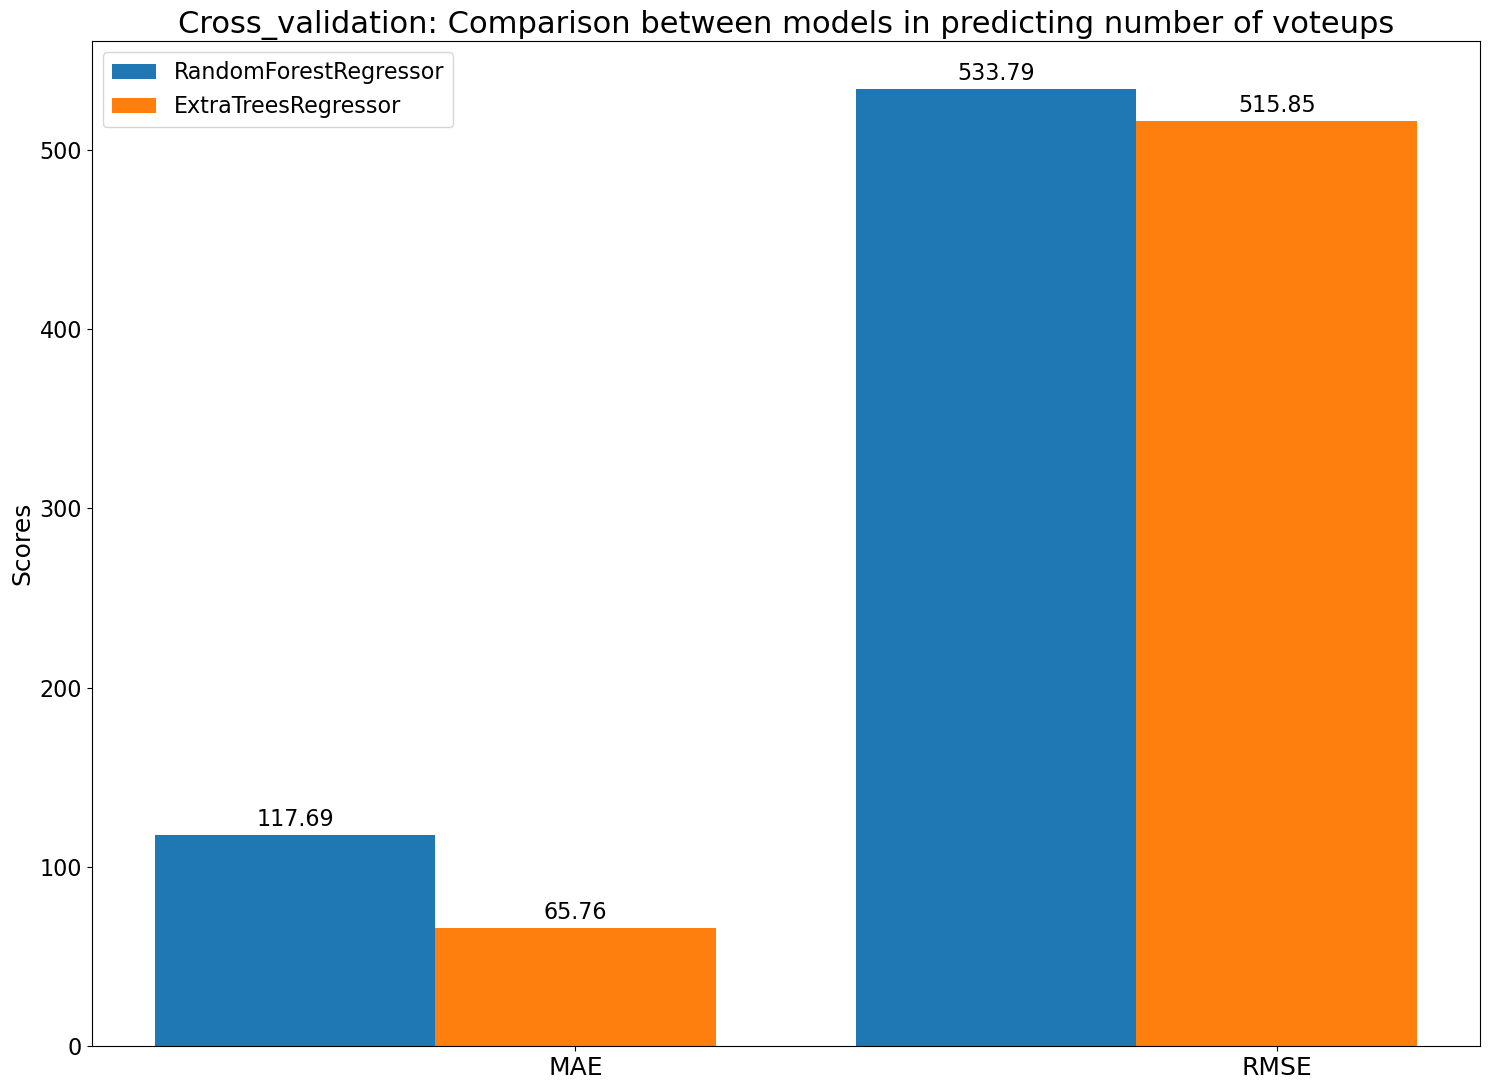

In [32]:
comparing_models_cross_validation_bar_plot([random_forest, extra_tree], X_train, y_train.iloc[:, 1],
    plot_title = "Cross_validation: Comparison between models in predicting number of voteups", cv = 5, save_path= "images/comparison_voteups_cross_validation.png")

Figure saved to images/comparison_comments_cross_validation.png


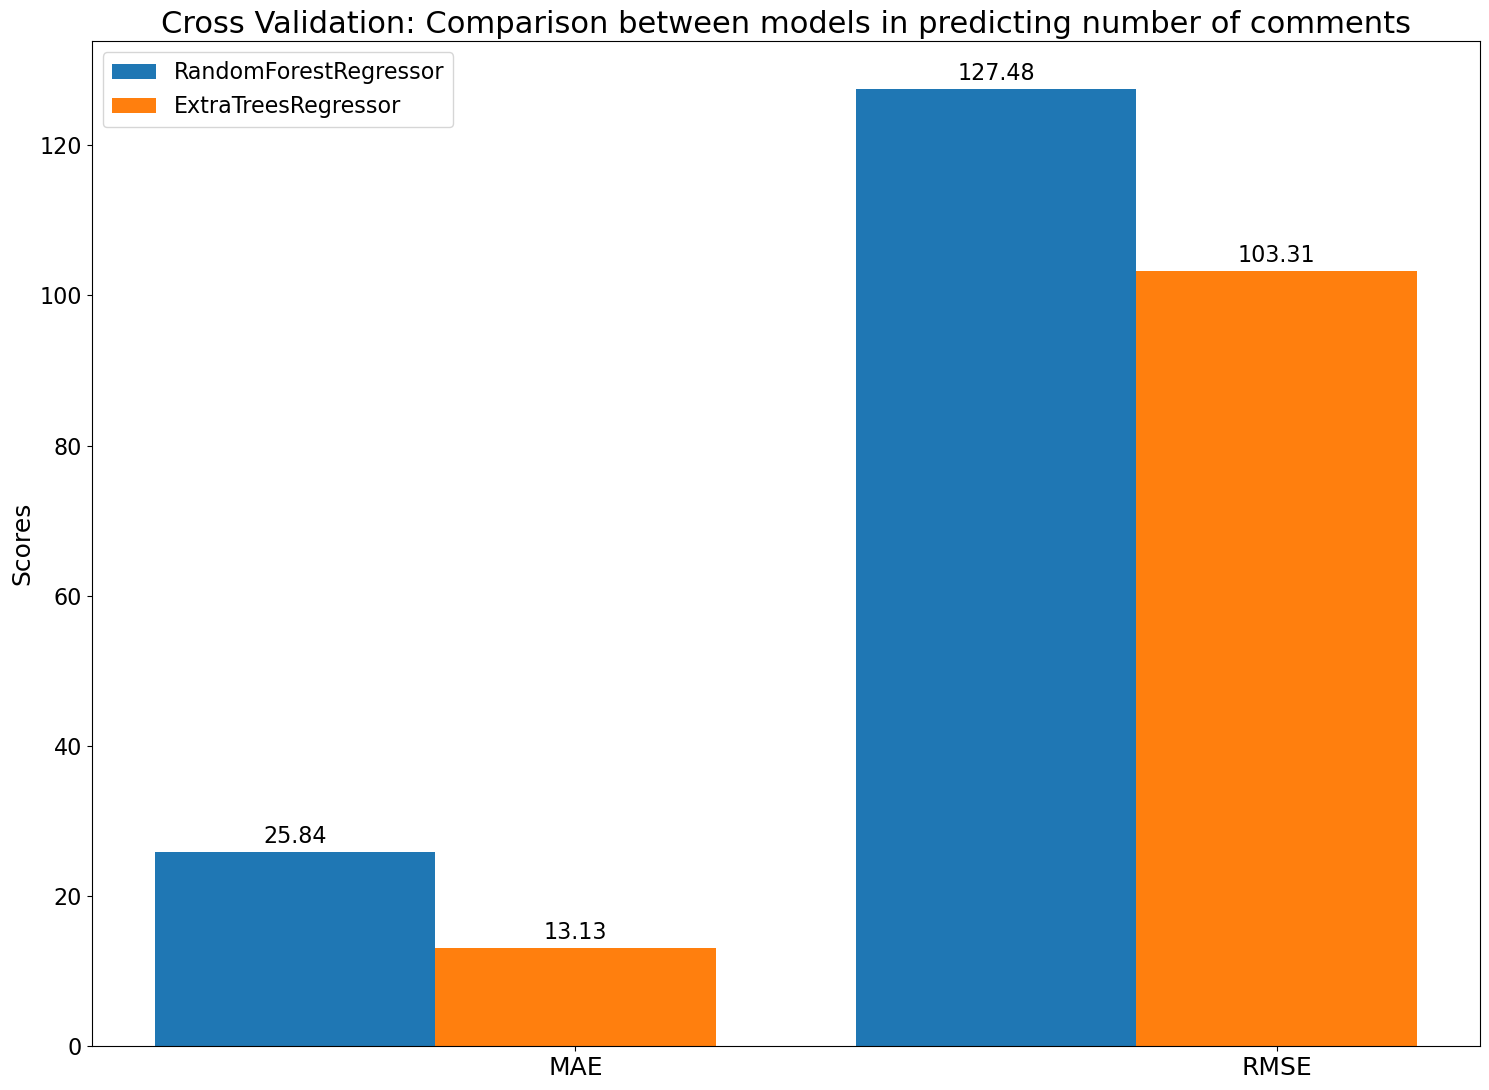

In [33]:
comparing_models_cross_validation_bar_plot([random_forest_2, extra_tree_2], X_train, y_train.iloc[:, 0], 
    plot_title = "Cross Validation: Comparison between models in predicting number of comments", cv = 5, save_path="images/comparison_comments_cross_validation.png")

# **Utility functions, for inference purpose.**

**Function to categorize the time of the day**

In [34]:
from predict import categorize_time_of_day
test_datetime = datetime.now()
categorize_time_of_day(test_datetime)

{'isNight': 0, 'isMorning': 0, 'isAfternoon': 0, 'isEvening': 1}

**Getting the length of the string. Later we will use the post title and post content given by the user on the Website to feed into this function**

In [35]:
from predict import string_length
# Test the function
input_string = "Hello, World!"
print("Length of the string:", string_length(input_string))

Length of the string: 13


**Function to receive the URL referenced link given by the user on the Website, and then return the name of the website of the URL link referenced in the Reddit post**

In [36]:
from predict import reference_external_link
# Test the function
url = "https://www.washingtonpost.com/opinions/"
website_list = ["bbc", "cnn", "theguardian"]

reference_external_link(url)

{'bbc': 0,
 'cnn': 0,
 'en': 0,
 'imgur': 0,
 'nbcnews': 0,
 'newsweek': 0,
 'nytimes': 0,
 'propublica': 0,
 'rawstory': 0,
 'reuters': 0,
 'salon': 0,
 'streamable': 0,
 'telegraph': 0,
 'theguardian': 0,
 'thehill': 0,
 'twitter': 0,
 'washingtonpost': 1,
 'x': 0,
 'youtube': 0,
 'Other': 0,
 'noURL': 0}

In [37]:
reference_external_link()

{'bbc': 0,
 'cnn': 0,
 'en': 0,
 'imgur': 0,
 'nbcnews': 0,
 'newsweek': 0,
 'nytimes': 0,
 'propublica': 0,
 'rawstory': 0,
 'reuters': 0,
 'salon': 0,
 'streamable': 0,
 'telegraph': 0,
 'theguardian': 0,
 'thehill': 0,
 'twitter': 0,
 'washingtonpost': 0,
 'x': 0,
 'youtube': 0,
 'Other': 0,
 'noURL': 1}

**Counting the number of occurences for each word in a list of words in Reddit post title and post content and return a dictionary.**

In [38]:
# Test the function
from predict import count_word_occurrences
long_string = "This is ago always been better than almost almost."

print(count_word_occurrences(long_string))

{'actually': 0, 'ago': 1, 'almost': 1, 'already': 0, 'also': 0, 'always': 1, 'amp': 0, 'another': 0, 'anyone': 0, 'anything': 0, 'around': 0, 'asked': 0, 'away': 0, 'back': 0, 'bad': 0, 'best': 0, 'better': 1, 'big': 0, 'bit': 0, 'ca': 0, 'call': 0, 'called': 0, 'came': 0, 'car': 0, 'care': 0, 'come': 0, 'company': 0, 'could': 0, 'dad': 0, 'daughter': 0, 'day': 0, 'days': 0, 'de': 0, 'dog': 0, 'done': 0, 'edit': 0, 'else': 0, 'end': 0, 'enough': 0, 'epd': 0, 'even': 0, 'ever': 0, 'every': 0, 'everyone': 0, 'everything': 0, 'experience': 0, 'face': 0, 'family': 0, 'far': 0, 'feel': 0, 'felt': 0, 'find': 0, 'first': 0, 'found': 0, 'friends': 0, 'fuck': 0, 'full': 0, 'fun': 0, 'game': 0, 'games': 0, 'get': 0, 'getting': 0, 'give': 0, 'go': 0, 'going': 0, 'good': 0, 'got': 0, 'great': 0, 'gt': 0, 'guy': 0, 'hard': 0, 'heard': 0, 'help': 0, 'home': 0, 'hours': 0, 'house': 0, 'https': 0, 'husband': 0, 'instead': 0, 'job': 0, 'keep': 0, 'kids': 0, 'kind': 0, 'know': 0, 'last': 0, 'least': 0, 

# **Inference**

**Test the inference function written in predict.py. Infering the number of voteups for different Scikit-learn Machine Learning models.**

In [39]:
inference_items(linear_svr, 15, datetime.today(), 
                posting_title = "face old woman women women pretty pretty girl", 
               posting_content = "the content must be saying probably actually ago almost ago ago")

2167.2268020791253

In [40]:
inference_items(random_forest, 15, datetime.today(), 
                posting_title = "face old woman women women pretty pretty girl", 
               posting_content = "the content must be saying probably actually ago almost ago ago")

1459.5846717171717

In [41]:
inference_items(extra_tree, 15, datetime.today(), 
                posting_title = "face old woman women women pretty pretty girl nothing ago ago", 
               posting_content = "the content must be saying probably actually ago almost ago ago")

1547.5708333333334

In [42]:
inference_items(grad_boost, 15, datetime.today(), 
                posting_title = "face old woman women women pretty pretty girl", 
               posting_content = "the content must be saying probably actually ago almost ago ago")

2618.436963850048

# **Saving the trained scikit learn models**

**Saving the best models into a directory**

In [44]:
from utility import save_model
save_model(random_forest, "models/RandomForest_voteups.pkl")
save_model(random_forest_2, "models/RandomForest_comments.pkl")
save_model(extra_tree, "models/ExtraTree_voteups.pkl")
save_model(extra_tree_2, "models/ExtraTree_comments.pkl")

Model saved to models/RandomForest_voteups.pkl
Model saved to models/RandomForest_comments.pkl
Model saved to models/ExtraTree_voteups.pkl
Model saved to models/ExtraTree_comments.pkl
